<a href="https://colab.research.google.com/github/erinmcmahon26/School_EDA/blob/main/Housing_Prices_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest Data

In [2]:
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()
import io
df_housing_prices = pd.read_csv(io.BytesIO(uploaded['housing_prices_train_data.csv']))

Saving housing_prices_train_data.csv to housing_prices_train_data.csv


In [5]:
df_housing_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
df_housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Create Test Set - not sure if I needed to do this

In [44]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [47]:
train_set, test_set = split_train_test(df_housing_prices, 0.2)
print(len(train_set))
print(len(test_set))

1168
292


## EDA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [10]:
pd.set_option("display.max_rows", None)

In [7]:
df_housing_prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df_housing_prices.describe(include = "O")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [9]:
df_housing_prices.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Assessing Dependent Variable/Outliers

In [12]:
df_housing_prices['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

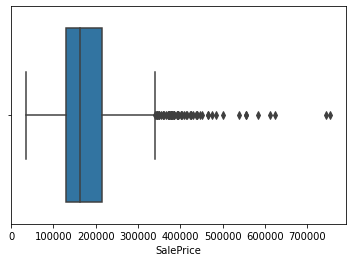

In [13]:
sns.boxplot(x='SalePrice', data=df_housing_prices)

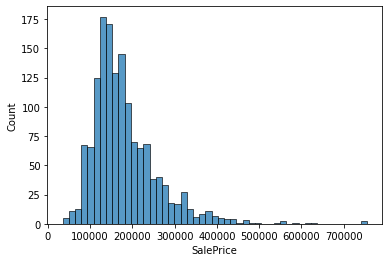

In [14]:
sns.histplot(x='SalePrice', data = df_housing_prices)

In [15]:
# took out outliers based on boxplot outlier indications
outliers = df_housing_prices[df_housing_prices['SalePrice'] > 350000]
len(outliers)

54

In [16]:
# created new df excluding outliers
df_lessthen350k = df_housing_prices[df_housing_prices['SalePrice'] <= 350000]

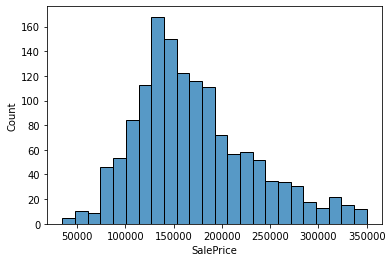

In [18]:
sns.histplot(x='SalePrice', data = df_lessthen350k)

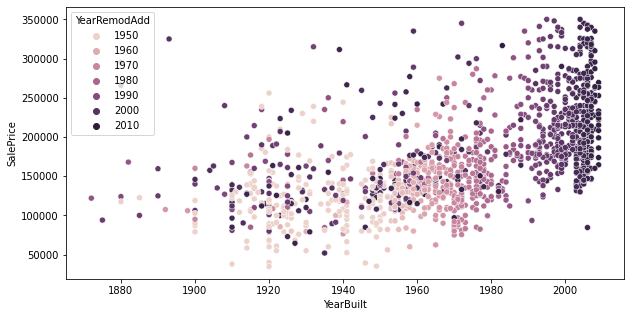

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='YearBuilt', y='SalePrice', hue='YearRemodAdd', data= df_lessthen350k)

### Search For Features

In [21]:
# combine like features
df_lessthen350k['TotalBath'] = df_lessthen350k['BsmtFullBath'] + 0.5*(df_lessthen350k['BsmtHalfBath']) +df_lessthen350k['FullBath'] + 0.5*(df_lessthen350k['HalfBath'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


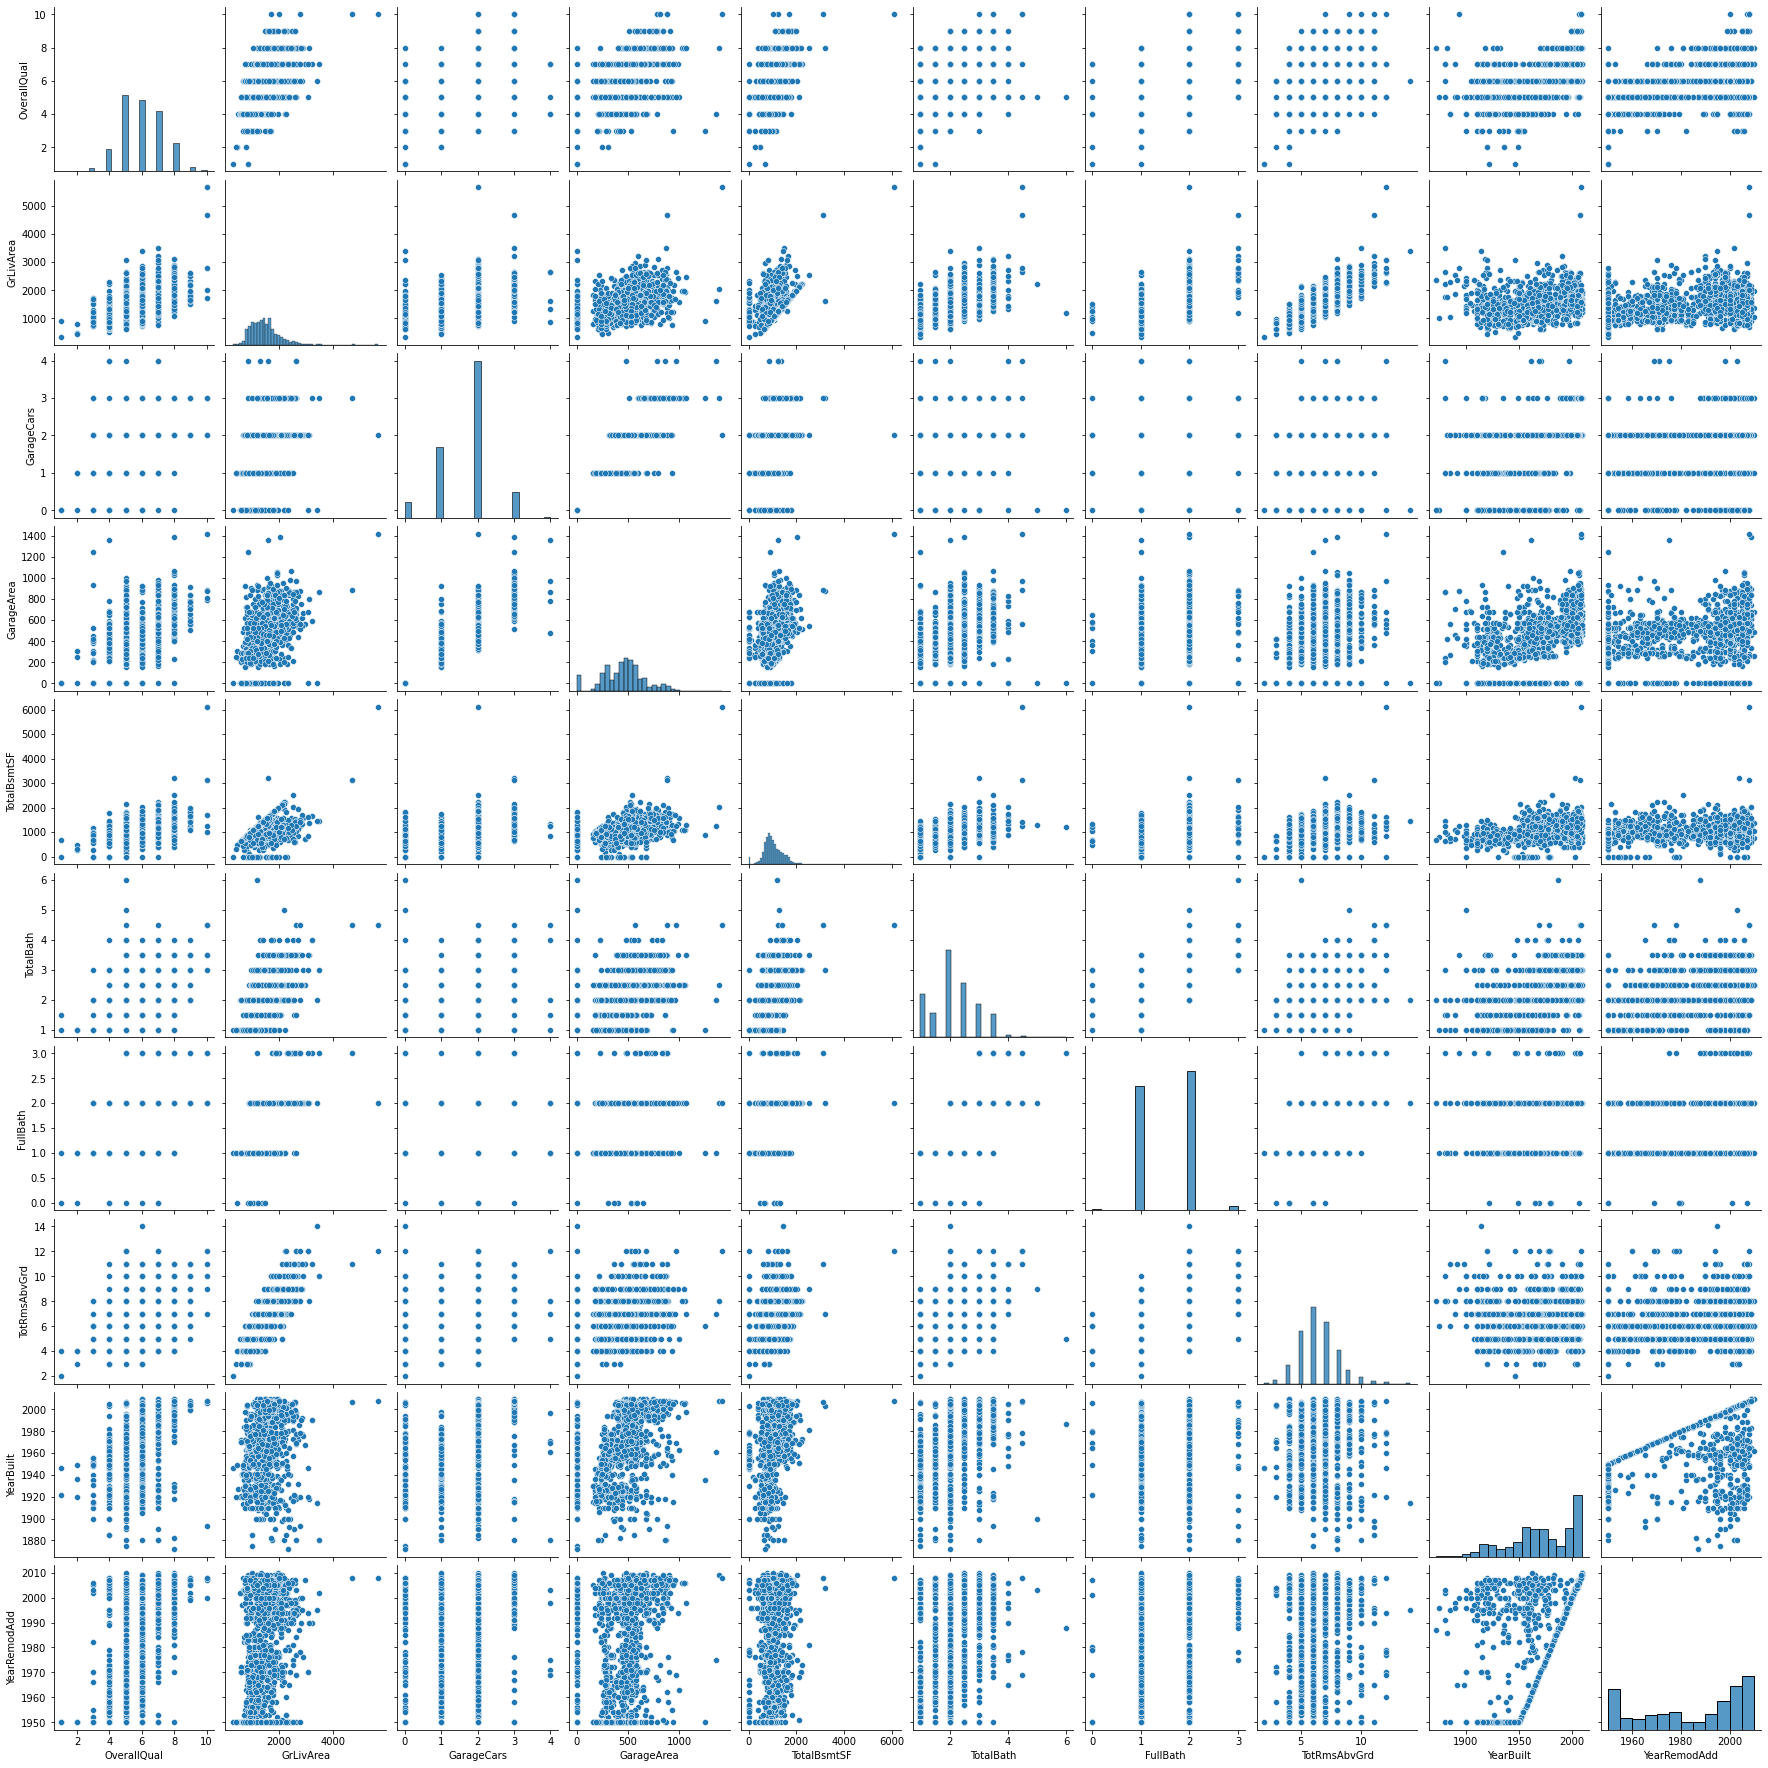

In [26]:
sns.pairplot(df_lessthen350k_corr)

In [22]:
corr_matrix = df_lessthen350k.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.786782
GrLivArea        0.668598
TotalBath        0.640550
GarageCars       0.633250
GarageArea       0.613226
FullBath         0.581281
YearBuilt        0.563842
TotalBsmtSF      0.546806
YearRemodAdd     0.539863
1stFlrSF         0.525214
GarageYrBlt      0.507040
TotRmsAbvGrd     0.481137
Fireplaces       0.455876
MasVnrArea       0.366384
2ndFlrSF         0.326451
OpenPorchSF      0.325439
LotFrontage      0.324234
WoodDeckSF       0.306803
BsmtFinSF1       0.303796
HalfBath         0.285982
LotArea          0.246926
BsmtUnfSF        0.213847
BsmtFullBath     0.209889
BedroomAbvGr     0.206744
ScreenPorch      0.102655
MoSold           0.074079
PoolArea         0.046710
3SsnPorch        0.040766
BsmtFinSF2       0.002779
MiscVal         -0.013894
Id              -0.016095
BsmtHalfBath    -0.021942
YrSold          -0.031760
OverallCond     -0.049012
LowQualFinSF    -0.058591
MSSubClass      -0.058979
EnclosedPorch   -0.139592
KitchenAbvGr

Text(0.5, 1.0, 'Correlation Housing Prices Features')

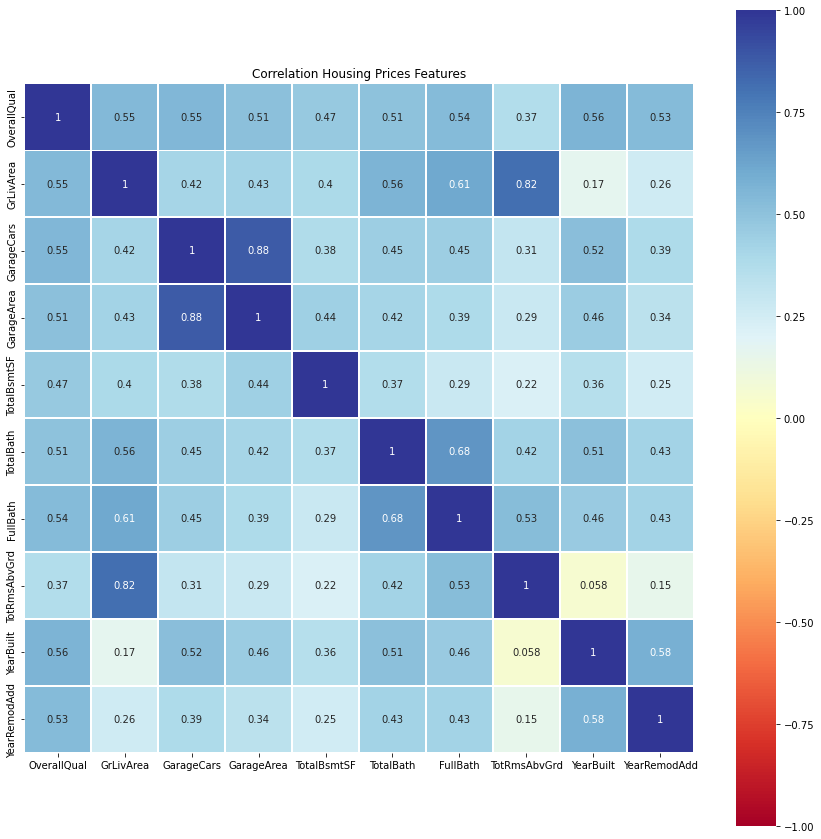

In [25]:
# pull out top 10 most correlated quantitative variables
columns = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','TotalBath','FullBath',
           'TotRmsAbvGrd','YearBuilt','YearRemodAdd']
df_lessthen350k_corr = df_lessthen350k[columns]
df_lessthen350k_corr.corr()

corrmat = df_lessthen350k_corr.corr()

f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot = True, cmap = 'RdYlBu', linewidths =.5)
plt.title('Correlation Housing Prices Features')

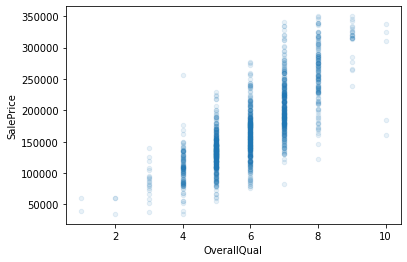

In [27]:
df_lessthen350k.plot(kind='scatter', x= 'OverallQual', y = 'SalePrice', alpha = 0.1)

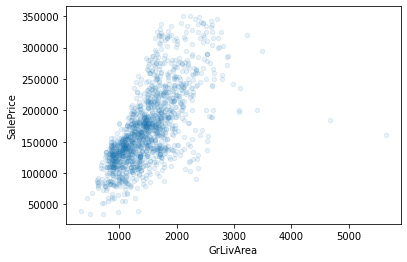

In [28]:
df_lessthen350k.plot(kind='scatter', x= 'GrLivArea', y = 'SalePrice', alpha = 0.1)

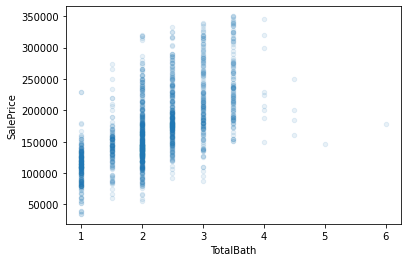

In [29]:
df_lessthen350k.plot(kind='scatter', x= 'TotalBath', y = 'SalePrice', alpha = 0.1)

In [31]:
df_lessthen350k[['SalePrice','OverallQual']].groupby('OverallQual').describe()

SalePrice                 ...                    
                count           mean  ...       75%       max
OverallQual                           ...                    
1                 2.0   50150.000000  ...   55575.0   61000.0
2                 3.0   51770.333333  ...   60000.0   60000.0
3                20.0   87473.750000  ...   97500.0  139600.0
4               116.0  108420.655172  ...  125500.0  256000.0
5               397.0  133523.347607  ...  147000.0  228950.0
6               374.0  161603.034759  ...  181000.0  277000.0
7               317.0  206632.709779  ...  230000.0  341000.0
8               149.0  258656.120805  ...  287090.0  350000.0
9                23.0  312765.956522  ...  327450.0  350000.0
10                5.0  263450.000000  ...  325000.0  337500.0

[10 rows x 8 columns]

KeyboardInterrupt: ignored

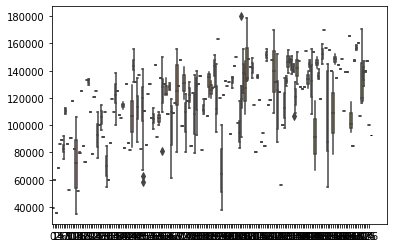

In [37]:
# need to do this differently somehow.....
sns.boxplot(x='GrLivArea',y='SalePrice', data = df_lessthen350k)

In [38]:
df_lessthen350k[['SalePrice','TotalBath']].groupby('TotalBath').describe()

SalePrice                               ...                              
              count           mean           std  ...       50%       75%       max
TotalBath                                         ...                              
1.0           228.0  110869.671053  28375.647150  ...  112250.0  127500.0  230000.0
1.5           129.0  142692.372093  35599.840436  ...  142500.0  158000.0  274000.0
2.0           453.0  156603.075055  45812.050131  ...  145000.0  178000.0  320000.0
2.5           285.0  192929.936842  46335.213950  ...  181000.0  221000.0  333168.0
3.0           174.0  218264.902299  57631.885507  ...  209450.0  261600.0  340000.0
3.5           122.0  243525.745902  55015.915858  ...  235000.0  277750.0  350000.0
4.0             9.0  240408.222222  65989.395045  ...  225000.0  299800.0  345000.0
4.5             4.0  198687.500000  37972.234922  ...  192375.0  212500.0  250000.0
5.0             1.0  145900.000000           NaN  ...  145900.0  145900.0  145900.0
6.0             1.0  179000.000000           NaN  ...  179000.0  179000.0  179000.0

[10 rows x 8 columns]

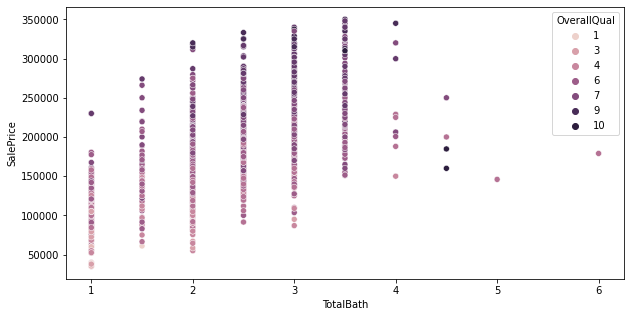

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='TotalBath', y='SalePrice', hue='OverallQual', data=df_lessthen350k)

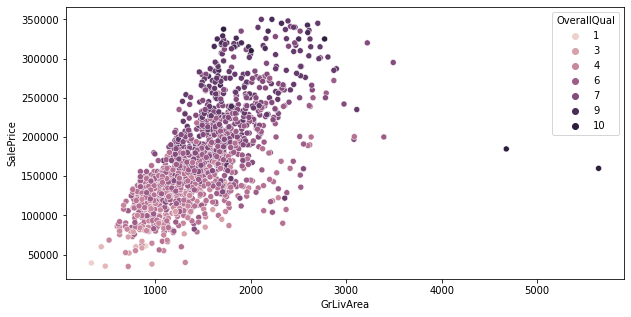

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', data=df_lessthen350k)

#### Assess Categorical Variables - GET BACK TO THIS

In [ ]:
# H0 is that neighborhood and salesprice are not correlated
salepricetoneighborhood = df_lessthen350k.groupby('Neighborhood')['SalePrice'].apply(list)
# this very small P-value states that these are correlated
anovaresult = f_oneway(*salepricetoneighborhood)
print('P-value for anova is: ', anovaresult[1])